# Time Series

**Import dependencies**

In [43]:
import pandas as pd
from darts import TimeSeries
from darts.models import ExponentialSmoothing, AutoARIMA, ARIMA
import matplotlib.pyplot as plt

**Load dataset**

In [44]:
data = pd.read_csv(
    "datasets/T10Y2Y.csv", parse_dates=["DATE"], index_col="DATE", decimal=","
)

print(data.head())

           T10Y2Y
DATE             
1976-06-01   0.68
1976-06-02   0.71
1976-06-03   0.70
1976-06-04   0.77
1976-06-07   0.79


**Check for missing values**

In [45]:
data.replace(to_replace=".", value=pd.NA, inplace=True)
print(
    f"{'Missing values are present. Dataset preprocessing is required.' if data.isna().any().any() else 'Missing values are not present.'}"
)

Missing values are present. Dataset preprocessing is required.


**Replace missing values with previous ones by index**

In [46]:
data["T10Y2Y"] = data["T10Y2Y"].replace(to_replace=pd.NA, method="ffill")

**Change column data type**

In [47]:
data["T10Y2Y"]: pd.Series = data["T10Y2Y"].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12319 entries, 1976-06-01 to 2023-08-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T10Y2Y  12319 non-null  float64
dtypes: float64(1)
memory usage: 192.5 KB


**Generate statistic**

In [48]:
data.describe(include="all", percentiles=[0.25, 0.5, 0.75])

,T10Y2Y
count,12319.000000
mean,0.889059
std,0.918825
min,-2.410000
25%,0.210000
50%,0.850000
75%,1.510000
max,2.910000


**Source plot**

<Axes: xlabel='DATE'>

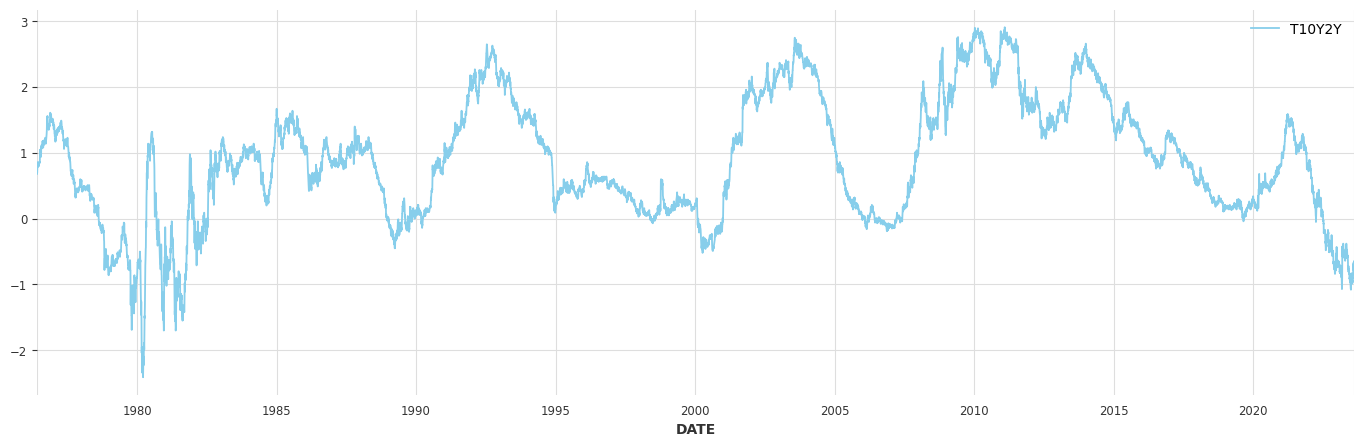

In [49]:
data.plot(figsize=(17, 5), color="skyblue")

**Comparative plot function**

In [50]:
def comparative_plot(time_series, predict):
    plt.figure(figsize=(17, 5))
    time_series.plot(label="actual", lw=2, color="skyblue")
    predict.plot(label="forecast", lw=2, color="orange")
    plt.legend()
    plt.show()

**Convert dataset to dart's TimeSeries**

In [51]:
series = TimeSeries.from_dataframe(df=data, value_cols="T10Y2Y")

**Split time_series into training and validation parts**

In [52]:
train, validate = series.split_before(0.615)

**Train and predict on ARIMA**

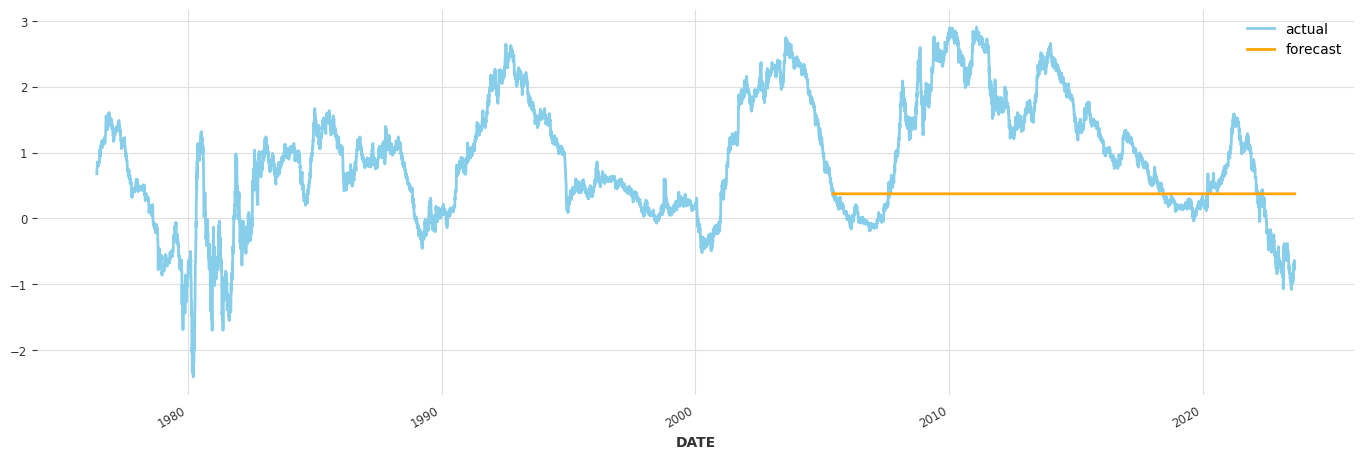

In [53]:
arima = ARIMA()
arima.fit(train)
arima_predict = arima.predict(len(validate))

comparative_plot(series, arima_predict)

**Train and predict on AutoARIMA**

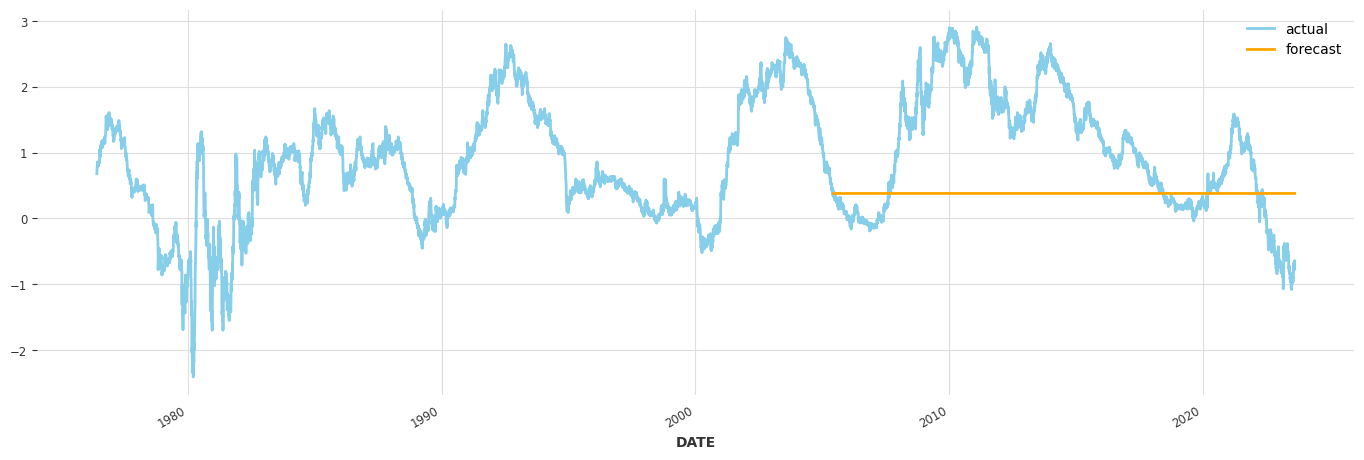

In [54]:
auto_arima = AutoARIMA()
auto_arima.fit(train)
auto_arima_predict = auto_arima.predict(len(validate))

comparative_plot(series, auto_arima_predict)

**Train and predict on Exponential Smoothing**

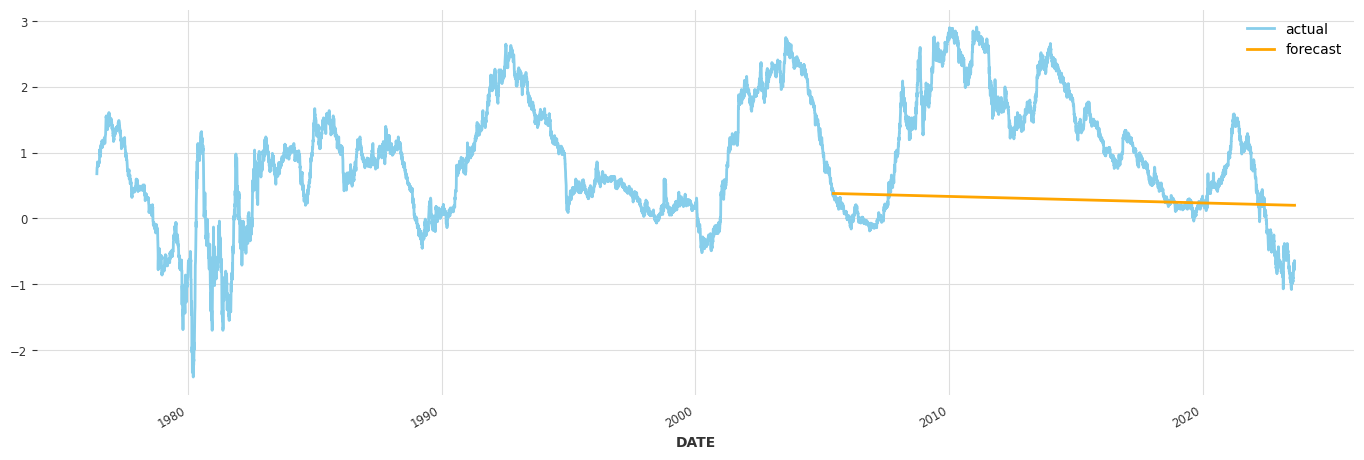

In [55]:
smoothing = ExponentialSmoothing()
smoothing.fit(series=train)
smoothing_predict = smoothing.predict(n=len(validate))

comparative_plot(time_series=series, predict=smoothing_predict)